In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import warnings
import pandas as pd
from time import sleep
from collections import defaultdict

warnings.filterwarnings(action='ignore')

from tqdm import tqdm
from crawler.utils.daily_reports import DailyReports

%matplotlib inline

In [3]:
elastic_info = {
    'host': 'https://crawler-es.cloud.ncsoft.com:9200', 
    'auth': 'ZWxhc3RpYzpzZWFyY2hUMjAyMA=='
}

reports = DailyReports(**elastic_info, encoded_auth='ZWxhc3RpYzpzZWFyY2hUMjAyMA==')

reports.set_plt_font()

<Figure size 1440x1440 with 0 Axes>

# 인덱스 수량

In [4]:
date_range = '2021-01-01~2021-03-31'
date_range = '2020-01-01~2020-12-31'
date_range = '2018-01-01~2018-12-31'

year = date_range.split('-')[0]

neddle = set([
    'nate', 
    year, 
    date_range.split('~')[1].split('-')[0]
])

In [5]:
index_size = [x for x in reports.state['size'] if set(x['index'].split('-')).intersection(neddle) == neddle]

In [6]:
df_size = pd.DataFrame(index_size).set_index('index')

df_size['count'] = df_size['count'].astype(float)

reports.custom_display(df_size.describe().T)

,count,mean,std,min,25%,50%,75%,max
count,7,772916,554317,90141,403330,651544,1099168,1663729


<AxesSubplot:>

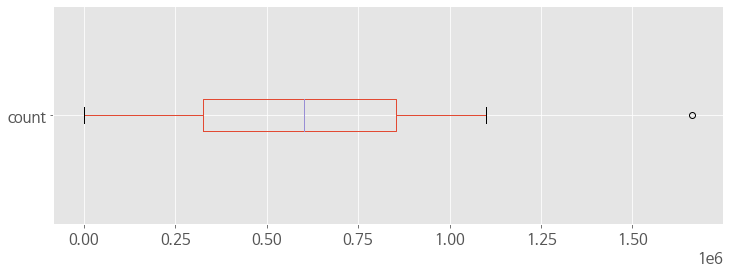

In [7]:
df_size.describe().boxplot(figsize=(12, 4), vert=False)

In [8]:
reports.custom_display(df_size)

,count
index,
crawler-nate-economy-2018,1053008
crawler-nate-entertainment-2018,1663729
crawler-nate-international-2018,204823
crawler-nate-it-2018,90141
crawler-nate-politics-2018,601836
crawler-nate-society-2018,1145329
crawler-nate-sports-2018,651544


<AxesSubplot:xlabel='index'>

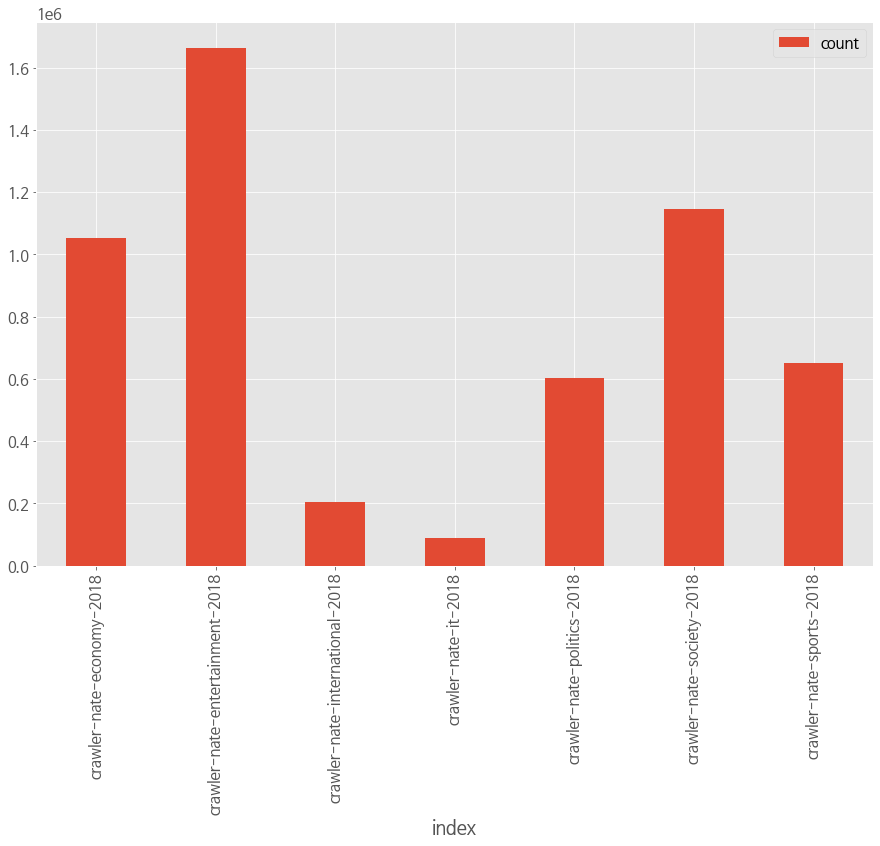

In [9]:
df_size.plot(kind='bar', figsize=(15, 10))

# 날짜별 기사 

In [ ]:
index_list = [x for x in reports.state['list'] if set(x.split('-')).intersection(neddle) == neddle]

data = reports.get_index_histogram(index_list=','.join(index_list), date_range=date_range)
    
df_date = pd.DataFrame(data).fillna(0)

In [ ]:
reports.custom_display(df_date)

In [ ]:
reports.custom_display(df_date.describe())

In [ ]:
order = df_date.describe().median().sort_values(ascending=False)
df_date.describe()[order.index].boxplot(figsize=(15, 7))

In [ ]:
# TODO: 한달 단위 그래프 표시 
month_st, month_en = 11, 12

mask = (f'{year}-{month_st:02}-01' <= df_date.index) & (df_date.index < f'{year}-{month_en:02}-01')
display(df_date[ mask ].plot(kind='barh', stacked=True, figsize=(15, 15)))

# 백필 현재 위치 

In [18]:
date_range = '2020-01-01~2020-12-31'

year = date_range.split('-')[0]

neddle = set([
    'nate', 
    year, 
    date_range.split('~')[1].split('-')[0]
])

index_list = [x for x in reports.state['list'] if set(x.split('-')).intersection(neddle) == neddle]
index_list

['crawler-nate-economy-2020',
 'crawler-nate-entertainment-2020',
 'crawler-nate-international-2020',
 'crawler-nate-it-2020',
 'crawler-nate-politics-2020',
 'crawler-nate-society-2020',
 'crawler-nate-sports-2020']

In [25]:
index_list = ['crawler-nate-economy-2018']
data = reports.get_category_min_date(index_list=','.join(index_list))

df_backfill_pos = pd.DataFrame(data).set_index(['section', 'category'])

df_backfill_pos

date
section category            
economy 경제/금융/증권  2018-01-01
        경제/경제 일반  2018-01-01
        경제/산업/기업  2018-01-02
        경제/국제경제   2018-01-02
        경제/부동산    2018-01-01
        경제/생활 경제  2018-01-01
        경제/취업/창업  2018-01-02